In [66]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_absolute_error,roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV

## Import and Split data

In [49]:
df_features = pd.read_csv('dengue_features_train.csv')
df_labels = pd.read_csv('dengue_labels_train.csv')

In [50]:
data = pd.merge(df_features, df_labels, on = ['city','year','weekofyear'], how = 'left')
data["week_start_date"] = pd.to_datetime(data["week_start_date"])

In [18]:
data.shape

(1456, 25)

In [ ]:
data.info()

In [ ]:
data.isna().sum()

In [51]:
sj = data[data.city == 'sj']
iq = data[data.city == 'iq']

In [52]:
sj = sj.drop(['city','year','weekofyear','week_start_date'],axis=1)
iq = iq.drop(['city','year','weekofyear','week_start_date'],axis=1)

In [53]:
print(sj.shape)
print(iq.shape)

(936, 21)
(520, 21)


In [55]:
# 8 : 2 train test split(adjust a bit for forward fillna)
sj_test_size = 189
iq_test_size = 108

sj_train, sj_test = sj[:-sj_test_size], sj[-sj_test_size:]
iq_train, iq_test = iq[:-iq_test_size], iq[-iq_test_size:]

In [57]:
# Forward fill NA values
sj_train = sj_train.fillna(method='ffill')
iq_train = iq_train.fillna(method='ffill')

sj_test = sj_test.fillna(method='ffill')
iq_test = iq_test.fillna(method='ffill')

In [58]:
sj_labels = sj[['total_cases']]
iq_labels = iq[['total_cases']]

In [59]:
# 分离特征和标签
def split_features_labels(data):
    return data.drop('total_cases', axis=1), data[['total_cases']].values.ravel()

sj_train_features, sj_train_labels = split_features_labels(sj_train)
sj_test_features, sj_test_labels = split_features_labels(sj_test)

iq_train_features, iq_train_labels = split_features_labels(iq_train)
iq_test_features, iq_test_labels = split_features_labels(iq_test)

In [ ]:
# print ('San Juan')
# print ('Shape of training features:',sj_train_features.shape)
# print ('Shape of training labels:',sj_train_labels.shape)
# print ('Shape of test features:',sj_test_features.shape)
# print ('Shape of test labels:',sj_test_labels.shape)

# print ('Iquitos')
# print ('Shape of training features:',iq_train_features.shape)
# print ('Shape of training labels:',iq_train_labels.shape)
# print ('Shape of test features:',iq_test_features.shape)
# print ('Shape of test labels:',iq_test_labels.shape)

## Random forest

### SJ

In [77]:
X_train = sj_train_features
y_train = sj_train_labels
X_test = sj_test_features
y_test = sj_test_labels

In [133]:
rfr_sj = RFR(n_estimators=25,random_state = 42,oob_score=True)
rfr_sj.fit(X_train, y_train)
pred_sj = rfr_sj.predict(X_test)
print('The MAE is {}'.format(round(mean_absolute_error(y_test, pred_sj), 2)))

The MAE is 27.46


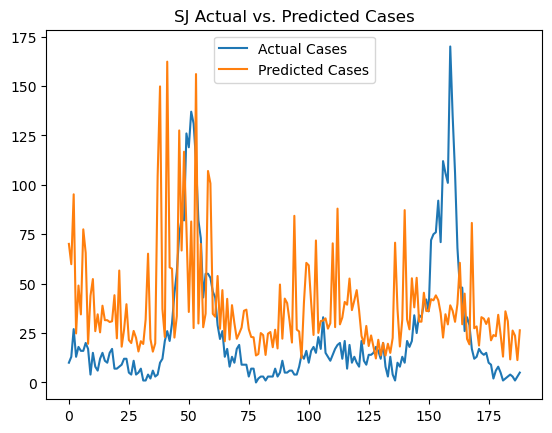

In [147]:
plt.plot(y_test, label="Actual Cases")

plt.plot(pred_sj, label="Predicted Cases")

plt.title("SJ Actual vs. Predicted Cases")
plt.legend()
plt.show()

-1.5564725500321515 61


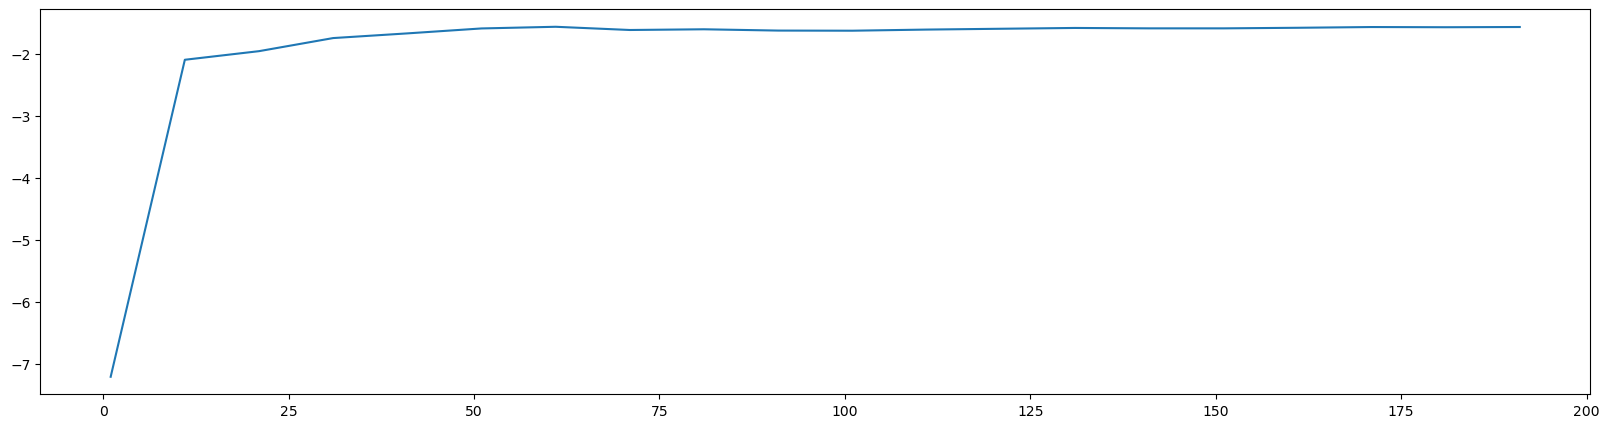

In [46]:
scorel = []
for i in range(0, 200, 10):
    rfr = RFR(n_estimators=i + 1,
                 n_jobs=-1,
                 random_state=42)
    score = cross_val_score(rfr, X_train, y_train, cv=10).mean()
    scorel.append(score)
print(max(scorel), (scorel.index(max(scorel)) * 10) + 1)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201, 10), scorel)
plt.show()

Text(0.5, 1.0, 'SJ Feature importance')

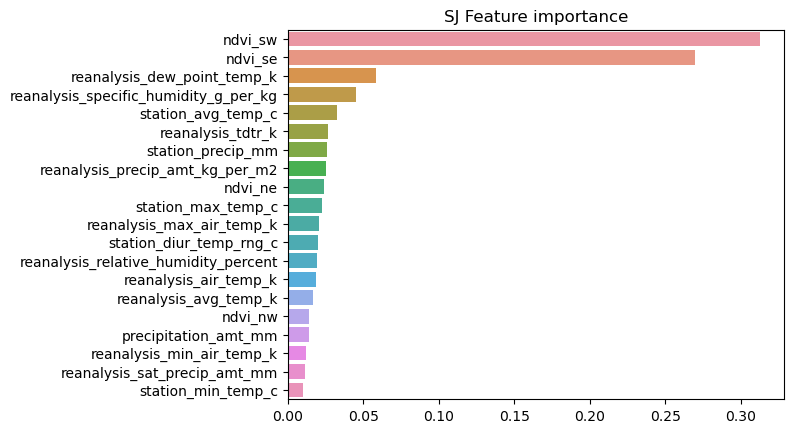

In [151]:
features = X_train.columns
importances = rfr_sj.feature_importances_
idx = np.argsort(importances)[::-1]

sns.barplot(x = importances[idx], y = features[idx])
plt.title("SJ Feature importance")

### IQ

In [135]:
X_train1 = iq_train_features
y_train1 = iq_train_labels
X_test1 = iq_test_features
y_test1 = iq_test_labels

In [63]:
# # Features to be normalized
# features_to_normalize = ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
#                          'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'station_avg_temp_c',
#                          'station_max_temp_c', 'station_min_temp_c']

# # Features to be scaled
# features_to_scale = ['station_diur_temp_rng_c', 'reanalysis_tdtr_k', 'precipitation_amt_mm',
#                      'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent',
#                      'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
#                      'station_precip_mm']

# sc = StandardScaler()
# # Fit and transform the scaler to the features to be scaled in both training and testing sets
# X_train[features_to_scale] = sc.fit_transform(X_train[features_to_scale])
# X_test[features_to_scale] = sc.transform(X_test[features_to_scale])

# minmax = MinMaxScaler()
# # Fit and transform the minmax scaler to the features to be normalized in both training and testing sets
# X_train[features_to_normalize] = minmax.fit_transform(X_train[features_to_normalize])
# X_test[features_to_normalize] = minmax.transform(X_test[features_to_normalize])

In [144]:
rfr_iq = RFR(n_estimators=25,random_state = 42,oob_score=True)
rfr_iq.fit(X_train1, y_train1)
pred_iq = rfr_iq.predict(X_test1)
print('The MAE is {}'.format(round(mean_absolute_error(y_test1, pred_iq), 2)))

The MAE is 7.71


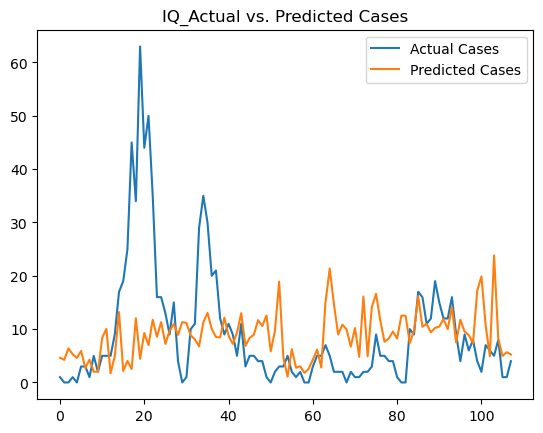

In [148]:
plt.plot(y_test1, label="Actual Cases")

plt.plot(pred_iq, label="Predicted Cases")

plt.title("IQ_Actual vs. Predicted Cases")
plt.legend()
plt.show()

Text(0.5, 1.0, 'IQ Feature importance')

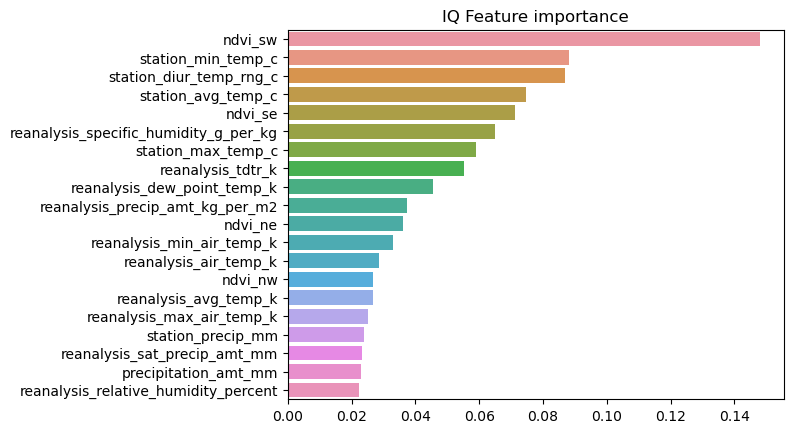

In [150]:
features_iq = X_train1.columns
importances_iq = rfr_iq.feature_importances_
idx_iq = np.argsort(importances_iq)[::-1]

sns.barplot(x = importances_iq[idx_iq], y = features_iq[idx_iq])
plt.title("IQ Feature importance")